In [1]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

Temos 6028 imagens
Some image examples: 
60_1477845318.jpg


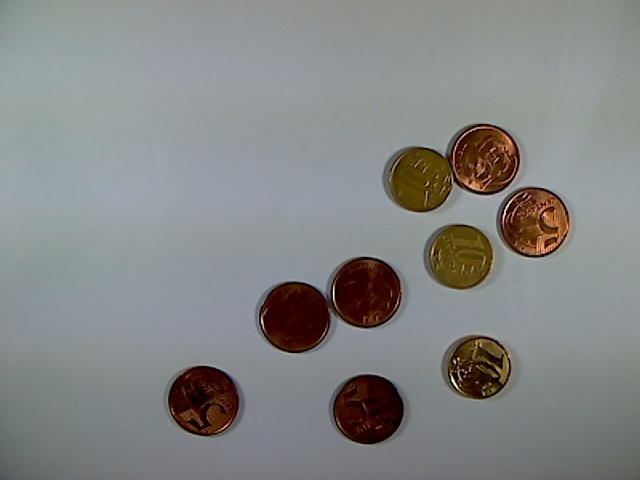

5_1477291608.jpg


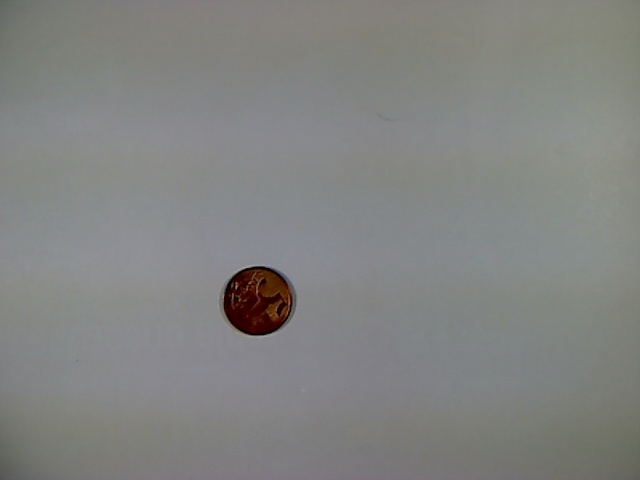

In [3]:
folder = "../data/deeplearning/all"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Temos {0} imagens".format(len(onlyfiles)))
print("Some image examples: ")

for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))

In [4]:
def my_img_to_array(image_files):
    
    #Medidas originais 
    image_width = 640
    image_height = 480
    ratio = 4
    
    image_width = int(image_width / ratio)
    image_height = int(image_height / ratio)


    channels = 3
    nb_classes = 1

    dataset = np.ndarray(shape=(len(image_files), channels, image_height, image_width),
                         dtype=np.float32)

    i = 0
    for _file in image_files:
        img = load_img(folder + "/" + _file)  # this is a PIL image
        img.thumbnail((image_width, image_height))
        #img = img.convert('L')
        # Transformando em Numpy Array
        x = img_to_array(img, dim_ordering="th") 
        #print(x.shape)
        #x = x.reshape((1,) + x.shape)
        # Normalizando
        x = (x - 128.0) / 128.0
        dataset[i] = x
        i += 1
        if i % 100 == 0:
            print("%d images to array" % i)
    
    return dataset

In [5]:
train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train.append(int(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))


from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#Medidas originais 
image_width = 640
image_height = 480
ratio = 4

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    #img = img.convert('L')
    # Transformando em Numpy Array
    x = img_to_array(img, dim_ordering="th")  
    #x = img_to_array(img)  
    #print(x.shape)
    #x = x.reshape((1,) + x.shape)
    # Normalizando
    x = (x - 128.0) / 128.0
    dataset[i] = x
    #print dataset[i].shape
    i += 1
    if i % 500 == 0:
        print("%d images to array" % i)
print("All images to array!")
    

Files in train_files: 6028


Using Theano backend.
ERROR (theano.sandbox.cuda): nvcc compiler not found on $PATH. Check your nvcc installation and try again.


500 images to array
1000 images to array
1500 images to array
2000 images to array
2500 images to array
3000 images to array
3500 images to array
4000 images to array
4500 images to array
5000 images to array
5500 images to array
6000 images to array
All images to array!


In [6]:
from sklearn.cross_validation import train_test_split
#Splitting 
X_train, X_test, y_train, y_test = train_test_split(dataset, y_train, test_size=0.2, random_state=33)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=33)
print("Train set size: {0}, Val set size: {1}, Test set size: {2}".format(len(X_train), len(X_val), len(X_test)))

Train set size: 4822, Val set size: 603, Test set size: 603


In [7]:
from keras.utils import np_utils
"""
labels = {"5": 0, "10": 1, "25": 2, "50":3, "100":4} 
nb_classes = len(labels)

### Arrumando as labels
y_train = [labels[str(x)] for x in y_train]
y_val = [labels[str(x)] for x in y_val]
y_test = [labels[str(x)] for x in y_test]

y_train = np_utils.to_categorical(y_train, nb_classes)
y_val = np_utils.to_categorical(y_val, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

y_train[:5]
"""
""""""
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)
y_train[:5]

array([ 95,  25,  25,  25, 115])

In [8]:
#datagen = ImageDataGenerator(
#    featurewise_center=True,
#    featurewise_std_normalization=True,
#    rotation_range=20,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    horizontal_flip=True)


### Acho que height e width shift vao
### atrapalhar, pois podem tirar moedas da imagem
### O zoom tambem
datagen = ImageDataGenerator(
        rotation_range=90,
#        width_shift_range=0.2,
#        height_shift_range=0.2,
        shear_range=0.2,
#        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

datagen.fit(X_train)

val_datagen = ImageDataGenerator(
        rotation_range=90,
#        width_shift_range=0.2,
#        height_shift_range=0.2,
        shear_range=0.2,
#        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_datagen.fit(X_val)

In [9]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=X_train[0].shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('linear'))
model.add(Dropout(0.5))
model.add(Dense(1))

#model.load_weights("regressor1.h5")

sgd = SGD(lr=0.01, decay=1e-7, momentum=.9)
    
early_stop = EarlyStopping(monitor='mse', patience=5, verbose=1, mode='auto')

model.compile(loss='mse', optimizer='rmsprop')


"""
model.fit(X_train, 
          y_train,
          nb_epoch=20, 
          batch_size=20, 
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop])
"""

model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), 
                    samples_per_epoch=len(X_train),  
                    nb_epoch=10, 
                    validation_data=val_datagen.flow(X_val, y_val, batch_size=32),
                    nb_val_samples=len(X_val),
                    verbose=1,
                    callbacks=[early_stop])


Epoch 1/10
4822/4822 [==============================] - 397s - loss: 1524.0174 - val_loss: 1145.8493

/usr/local/lib/python2.7/dist-packages/keras/callbacks.py:346: RuntimeWarning: Early stopping requires mse available!
  (self.monitor), RuntimeWarning)



Epoch 2/10
4822/4822 [==============================] - 440s - loss: 1382.1202 - val_loss: 1038.6171
Epoch 3/10
4822/4822 [==============================] - 456s - loss: 1227.3095 - val_loss: 854.6944
Epoch 4/10
4822/4822 [==============================] - 439s - loss: 1003.0784 - val_loss: 725.5490
Epoch 5/10
4822/4822 [==============================] - 475s - loss: 845.8578 - val_loss: 552.9345
Epoch 6/10
4822/4822 [==============================] - 585s - loss: 759.4068 - val_loss: 548.7306
Epoch 7/10
4822/4822 [==============================] - 695s - loss: 660.6623 - val_loss: 466.4919


In [21]:
from math import sqrt
start = time()
predictions = model.predict(X_test)
print("Tempo médio de previsão: {0:.2f}s".format((time() - start)/len(X_test)))
#print("Acurácia na previsão: {0}".format(model.evaluate(X_test, y_test)))
print("Erro médio por previsão: {0:.2f} centavos".format(sqrt(model.evaluate(X_test, y_test))))
### 13.73 

Tempo médio de previsão: 0.03s
603/603 [==============================] - 20s    
Erro médio por previsão: 12.32 centavos


In [17]:
sgd = SGD(lr=0.01, decay=1e-7, momentum=.9)
early_stop = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='auto')
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), 
                    samples_per_epoch=len(X_train),  
                    nb_epoch=10, 
                    validation_data=val_datagen.flow(X_val, y_val, batch_size=32),
                    nb_val_samples=len(X_val),
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/10
4822/4822 [==============================] - 438s - loss: 325.2627 - val_loss: 227.7035
Epoch 2/10
4822/4822 [==============================] - 440s - loss: 334.6110 - val_loss: 253.4067
Epoch 3/10
4822/4822 [==============================] - 521s - loss: 330.8920 - val_loss: 206.5829
Epoch 4/10
4822/4822 [==============================] - 545s - loss: 323.8377 - val_loss: 207.6825
Epoch 5/10
4822/4822 [==============================] - 455s - loss: 324.8119 - val_loss: 334.5288
Epoch 6/10
4822/4822 [==============================] - 464s - loss: 326.2465 - val_loss: 228.1006
Epoch 7/10
4822/4822 [==============================] - 485s - loss: 332.9180 - val_loss: 187.2126
Epoch 8/10
4822/4822 [==============================] - 442s - loss: 325.5157 - val_loss: 146.0835
Epoch 9/10
4822/4822 [==============================] - 450s - loss: 323.8939 - val_loss: 440.9740
Epoch 10/10
4822/4822 [==============================] - 414s - loss: 312.1212 - val_loss: 170.4770


In [19]:
### Salvando os pesos
model.save_weights('regressor4.h5',overwrite=True)

In [20]:
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
early_stop = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='auto')
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), 
                    samples_per_epoch=len(X_train),  
                    nb_epoch=15, 
                    validation_data=val_datagen.flow(X_val, y_val, batch_size=32),
                    nb_val_samples=len(X_val),
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/15
4822/4822 [==============================] - 425s - loss: 295.9101 - val_loss: 147.8207
Epoch 2/15
4822/4822 [==============================] - 427s - loss: 304.7441 - val_loss: 221.2898
Epoch 3/15
4822/4822 [==============================] - 420s - loss: 315.8579 - val_loss: 220.3449
Epoch 4/15
4822/4822 [==============================] - 416s - loss: 317.3038 - val_loss: 177.8025
Epoch 5/15
4822/4822 [==============================] - 461s - loss: 314.7917 - val_loss: 228.5444
Epoch 6/15
4822/4822 [==============================] - 482s - loss: 322.4165 - val_loss: 178.8845
Epoch 7/15
4822/4822 [==============================] - 441s - loss: 307.5226 - val_loss: 192.2233
Epoch 8/15
4822/4822 [==============================] - 435s - loss: 292.2043 - val_loss: 172.7537
Epoch 9/15
4822/4822 [==============================] - 473s - loss: 308.5631 - val_loss: 173.1886


(faz tempo que esse link tá aqui, nem lembro mais se tinha algo importante)

http://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

### Resultados:
Imagem: normalizada, 160x120
Três épocas    
loss: 10092.9179 - val_loss: 12747.4773    
30 épocas  
loss: 17.9679 - val_loss: 3657.0876 

loss: 1370.2057 - val_loss: 3124.1294 

loss: 1297.7805 - val_loss: 2500.0276

loss: 516.1915 - val_loss: 1187.3157

loss: 414.3080 - val_loss: 1146.8943

In [26]:
from math import sqrt
start = time()
predictions = model.predict(X_test)
print("Tempo médio de previsão: {0:.2f}s".format((time() - start)/len(X_test)))
#print("Acurácia na previsão: {0}".format(model.evaluate(X_test, y_test)))
print("Erro médio por pevisão: {0:.2f}".format(sqrt(model.evaluate(X_test, y_test))))

Tempo médio de previsão: 0.03s
511/511 [==============================] - 14s    
Erro médio por pevisão: 9.87


In [22]:
print("{0:5} {1:10} {2:8}".format("True", "Predicted", "Error"))
for i in range(len(predictions[:10])):
    print("{0:5} {1:10} {2:8}".format(y_test[i], int(predictions[i]), abs(y_test[i] - int(predictions[i]))))

#print("{0:5} {1:10} {2:8}".format("True", "Predicted", "Correct?"))
#for i in range(len(preds[:10])):
#    print("{0:5} {1:10} {2:8}".format(np.argmax(y_test[i]), preds[i],(np.argmax(y_test[i]) == preds[i])))
          
#print predictions[:5].transpose()
#print y_test[:5]

True  Predicted  Error   
  100         96        4
   25         27        2
  115        116        1
    5          7        2
  100         95        5
  100         88       12
   80         76        4
   85         80        5
   10         17        7
    5         15       10


In [23]:
### Fazendo com que previsoes sejam multiplos de 5
def closer_multiple(x, mult):
    value = mult * int(x / multi)
    if (x % multi) > multi/2.0:
        value += multi
    return value

multi = 5
predictions = [closer_multiple(x, multi) for x in predictions]

print("{0:5} {1:10} {2:8}".format("True", "Predicted", "Error"))
for i in range(len(predictions[:10])):
    print("{0:5} {1:10} {2:8}".format(y_test[i], int(predictions[i]), abs(y_test[i] - int(predictions[i]))))

True  Predicted  Error   
  100         95        5
   25         25        0
  115        115        0
    5          5        0
  100         95        5
  100         90       10
   80         75        5
   85         80        5
   10         15        5
    5         15       10


### Prevendo valores em imagens novas e fora da distribuição original
Vamos usar uma pasta com o nome "unseen" para colocar imagens para teste.

[20, 25, 20, 10, 10, 10, 10, 10, 15, 10, 20, 10, 25, 25, 25, 10, 10, 20, 15, 15, 10, 20, 20, 15, 20]
25/25 [==============================] - 1s
Erro médio por previsão: 19.92
Previsao: 20. Valor real: 50


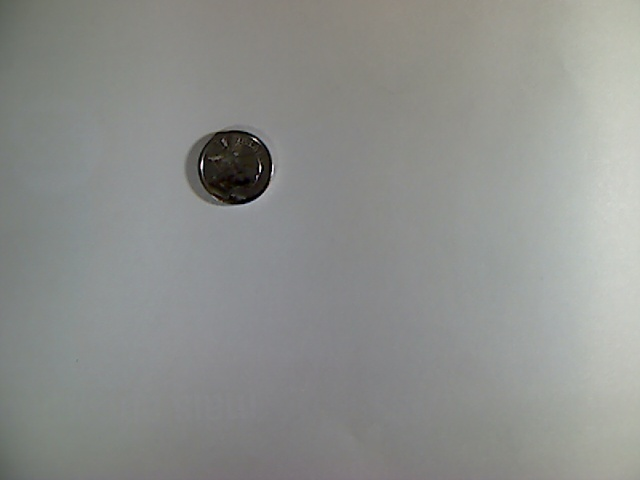

Previsao: 25. Valor real: 50


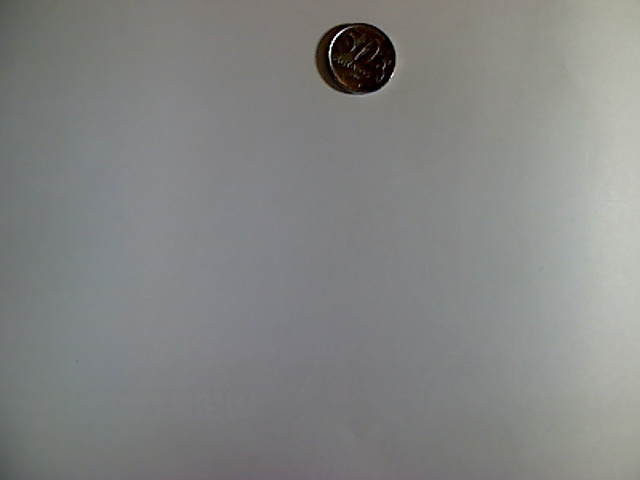

Previsao: 20. Valor real: 50


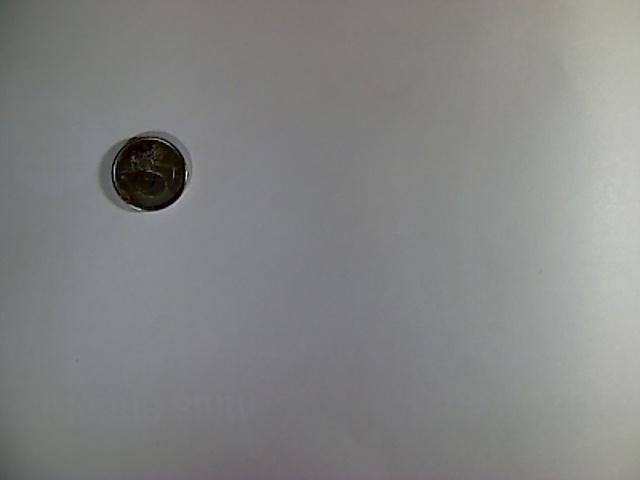

Previsao: 10. Valor real: 25


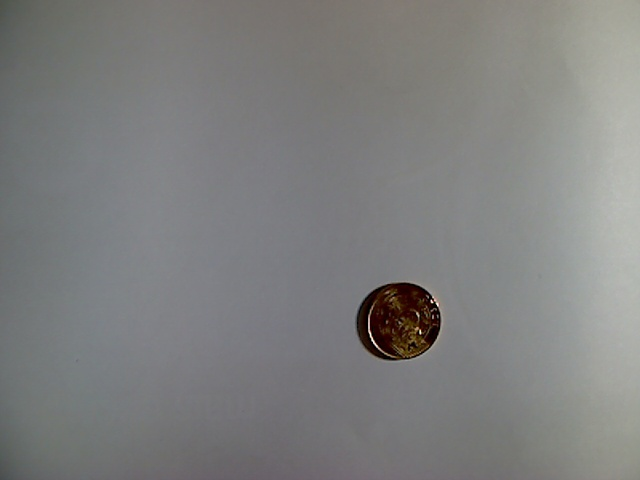

Previsao: 10. Valor real: 10


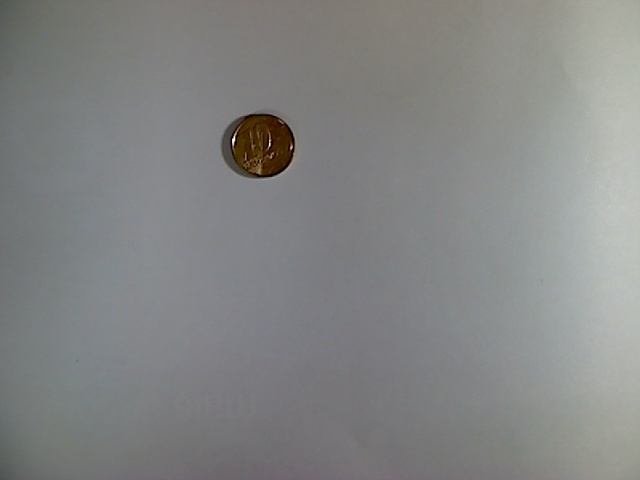

Previsao: 10. Valor real: 10


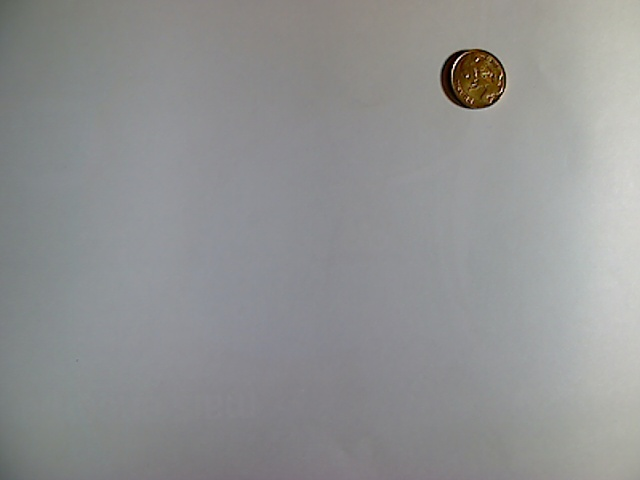

Previsao: 10. Valor real: 10


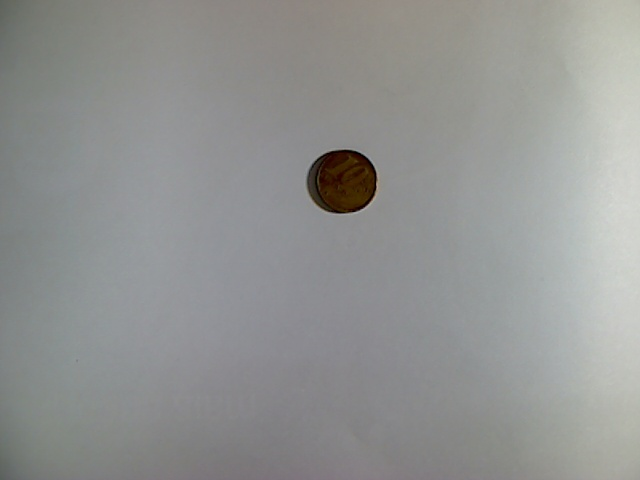

Previsao: 10. Valor real: 10


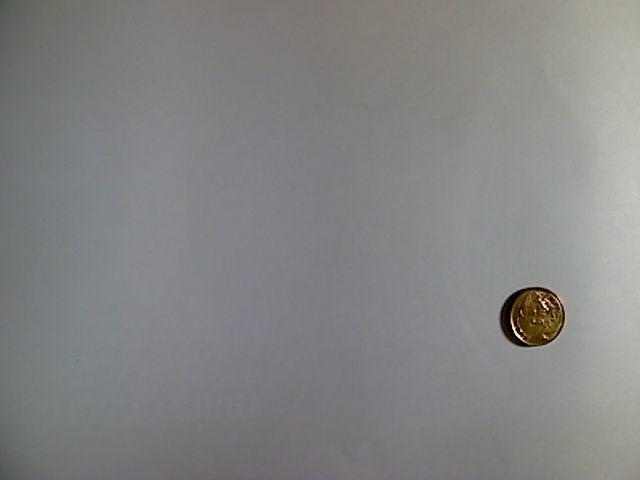

Previsao: 15. Valor real: 10


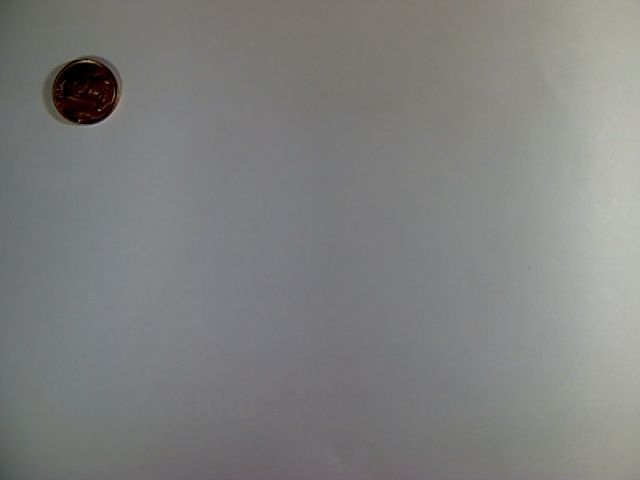

Previsao: 10. Valor real: 25


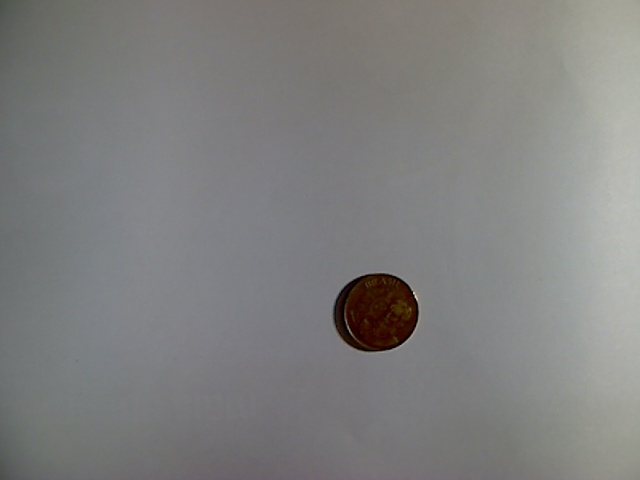

Previsao: 20. Valor real: 50


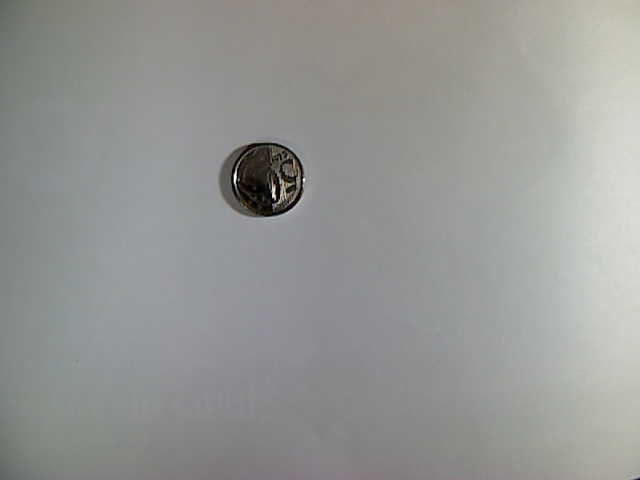

Previsao: 10. Valor real: 25


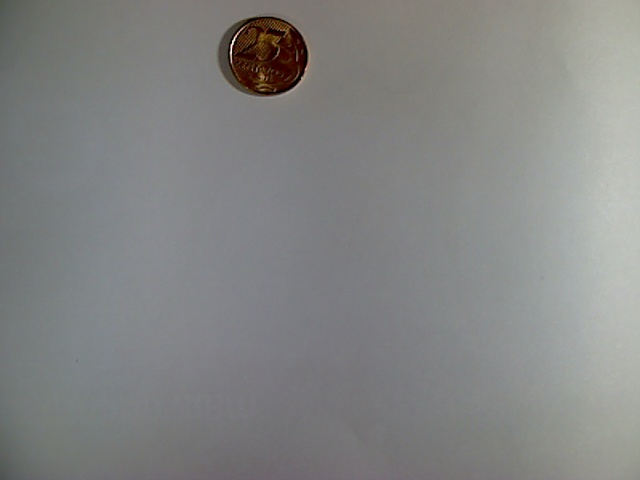

Previsao: 25. Valor real: 50


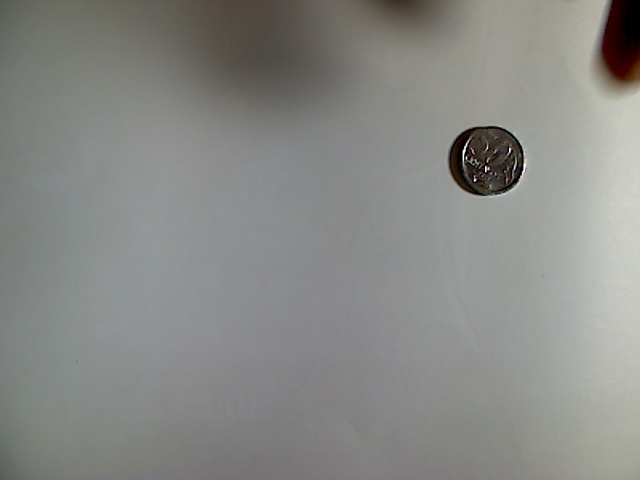

Previsao: 25. Valor real: 50


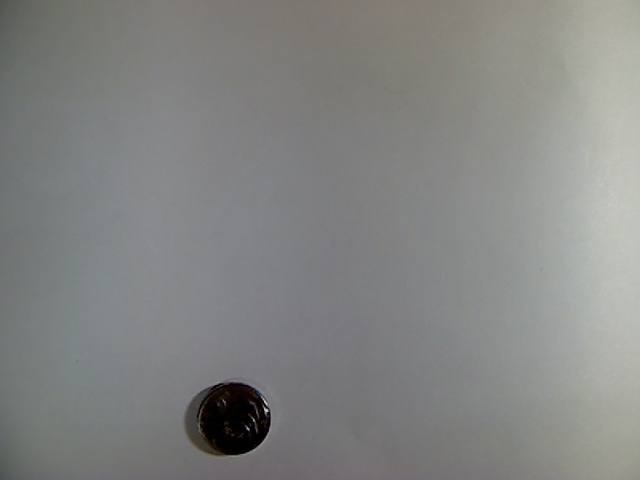

Previsao: 25. Valor real: 50


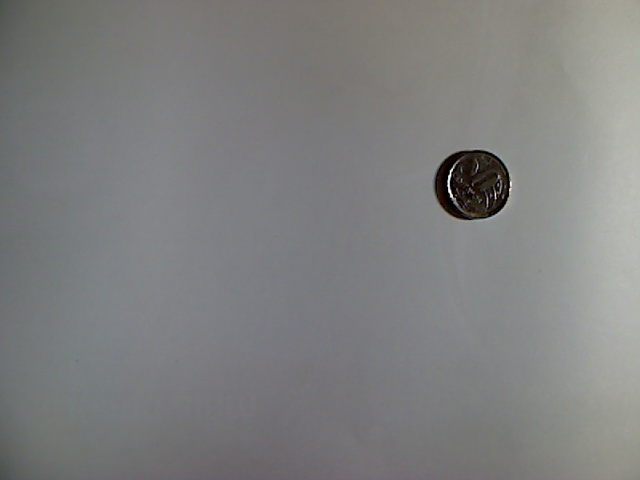

Previsao: 10. Valor real: 10


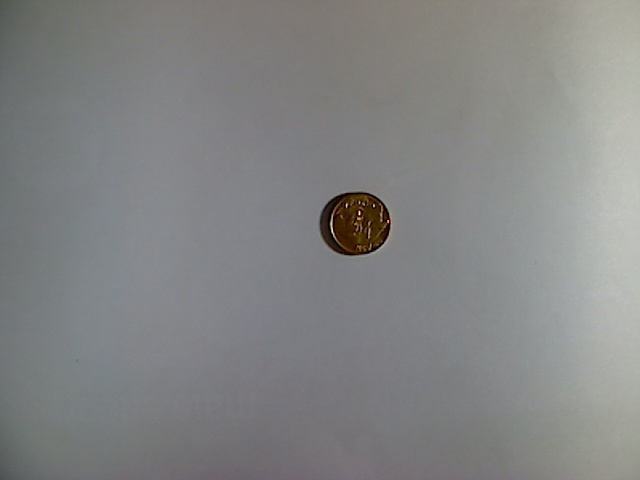

Previsao: 10. Valor real: 10


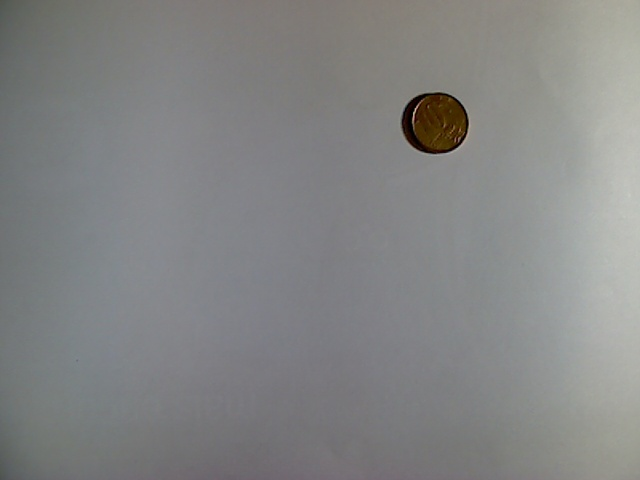

Previsao: 20. Valor real: 50


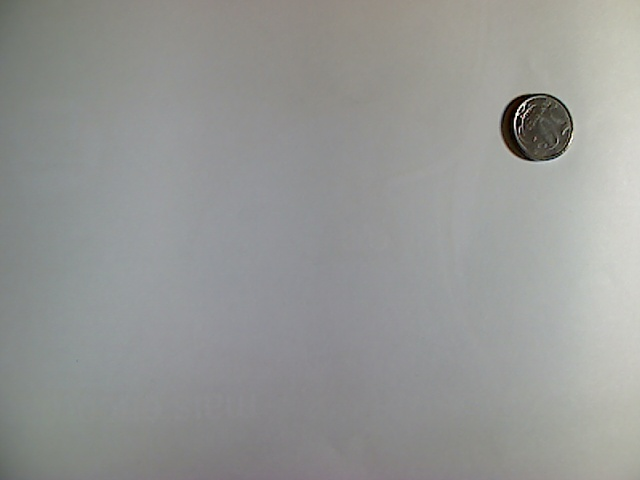

Previsao: 15. Valor real: 10


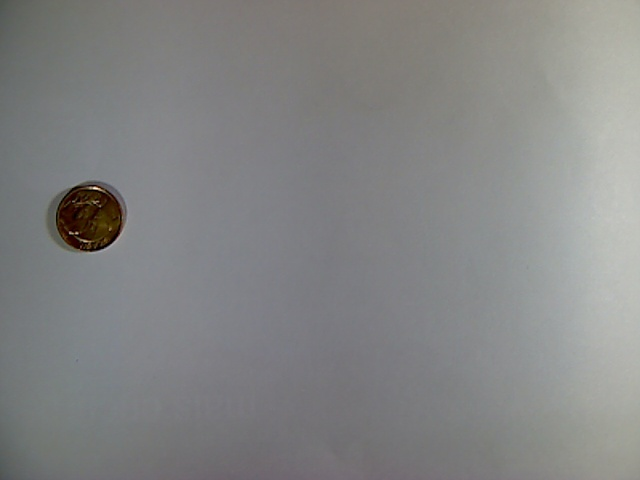

Previsao: 15. Valor real: 25


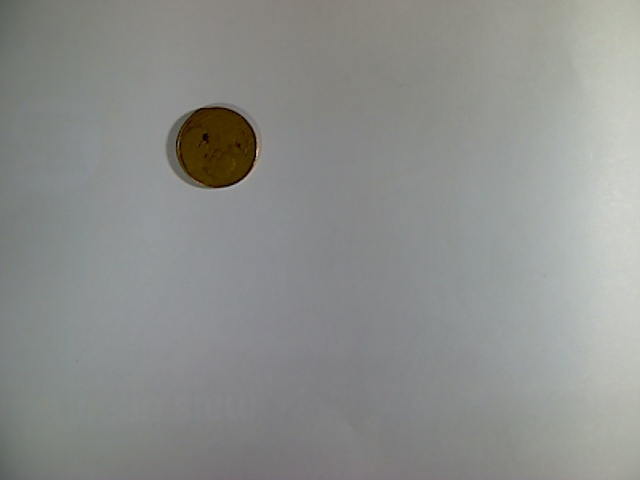

Previsao: 10. Valor real: 25


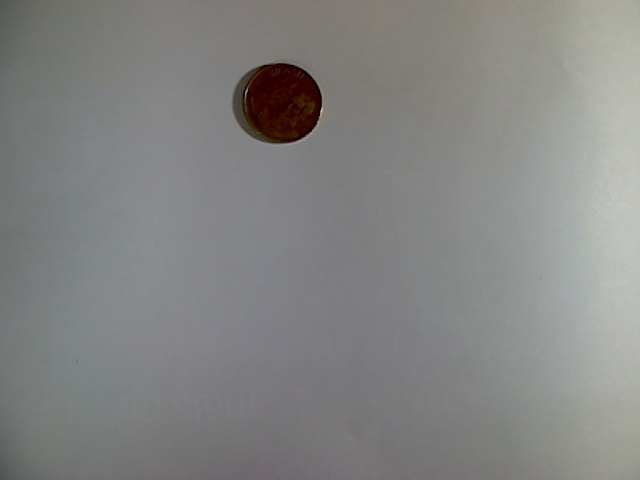

Previsao: 20. Valor real: 50


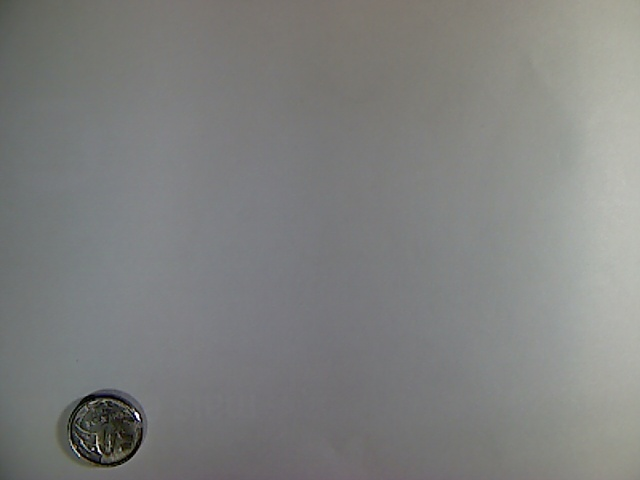

Previsao: 20. Valor real: 50


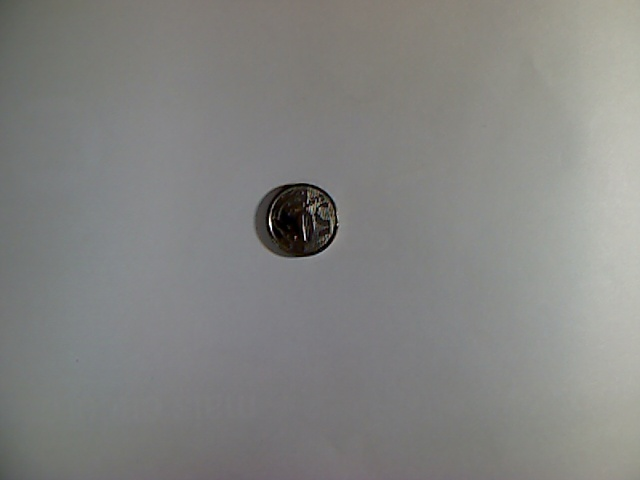

Previsao: 15. Valor real: 10


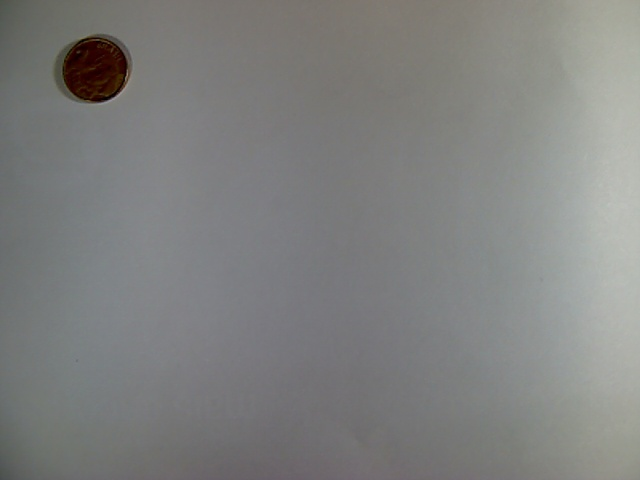

Previsao: 20. Valor real: 50


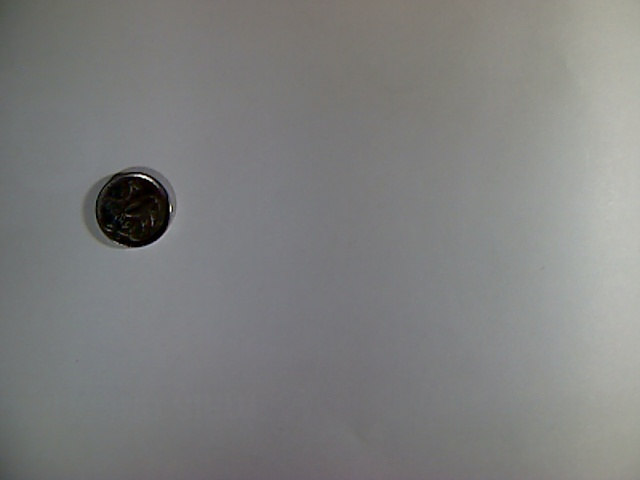

In [29]:
folder = "../data/deeplearning/unseen"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

data = my_img_to_array(onlyfiles)
predictions = model.predict(data)
#predictions = [np.argmax(pred) for pred in predictions]
predictions = [closer_multiple(x, multi) for x in predictions]
print(predictions)

values = []
for i in range(len(onlyfiles[:])):
    label_in_file = onlyfiles[i].find("_")
    value = int(onlyfiles[i][0:label_in_file])
    values.append(value)
y_unseen = values    
#values = [labels[str(x)] for x in values]
#y_unseen = np_utils.to_categorical(values, nb_classes)
print("Erro médio por previsão: {0:.2f}".format(sqrt(model.evaluate(data, y_unseen))))


for i in range(len(onlyfiles[:])):
    label_in_file = onlyfiles[i].find("_")
    value = int(onlyfiles[i][0:label_in_file])
    print("Previsao: {0}. Valor real: {1}".format(predictions[i], value))
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], height=240, width=320))

#labels.keys()[labels.values().index(predictions[i])]

### Um segundo modelo para regressão

In [25]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=X_train[0].shape))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('linear'))
model.add(Dropout(0.3))
model.add(Dense(1))

#model.load_weights("regressor1.h5")

sgd = SGD(lr=0.01, decay=1e-7, momentum=.9)
    
early_stop = EarlyStopping(monitor='mse', patience=5, verbose=1, mode='auto')

model.compile(loss='mse', optimizer='rmsprop')


"""
model.fit(X_train, 
          y_train,
          nb_epoch=20, 
          batch_size=20, 
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop])
"""

model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), 
                    samples_per_epoch=len(X_train),  
                    nb_epoch=10, 
                    validation_data=val_datagen.flow(X_val, y_val, batch_size=32),
                    nb_val_samples=len(X_val),
                    verbose=1,
                    callbacks=[early_stop])


Epoch 1/10
4822/4822 [==============================] - 632s - loss: 1649.1761 - val_loss: 3500.7965
Epoch 2/10
4822/4822 [==============================] - 642s - loss: 1408.8575 - val_loss: 3181.8298
Epoch 3/10
4822/4822 [==============================] - 662s - loss: 1159.9741 - val_loss: 3088.0233
Epoch 4/10
4822/4822 [==============================] - 635s - loss: 916.9954 - val_loss: 2788.3256
Epoch 5/10
4822/4822 [==============================] - 649s - loss: 763.1243 - val_loss: 3009.4535
Epoch 6/10
4822/4822 [==============================] - 678s - loss: 681.0900 - val_loss: 2602.7239
Epoch 7/10
4822/4822 [==============================] - 614s - loss: 602.3962 - val_loss: 2661.3925


In [28]:
early_stop = EarlyStopping(monitor='mse', patience=7, verbose=1, mode='auto')
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), 
                    samples_per_epoch=len(X_train),  
                    nb_epoch=20, 
                    validation_data=val_datagen.flow(X_val, y_val, batch_size=32),
                    nb_val_samples=len(X_val),
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/20
4822/4822 [==============================] - 714s - loss: 506.4000 - val_loss: 2195.4124
Epoch 2/20
4822/4822 [==============================] - 847s - loss: 492.2355 - val_loss: 2147.0279
Epoch 3/20
4822/4822 [==============================] - 842s - loss: 460.9630 - val_loss: 1808.6494
Epoch 4/20
4822/4822 [==============================] - 778s - loss: 453.9881 - val_loss: 1866.4432
Epoch 5/20
4822/4822 [==============================] - 777s - loss: 447.5909 - val_loss: 2236.7828
Epoch 6/20
4822/4822 [==============================] - 980s - loss: 427.4244 - val_loss: 2041.0644
Epoch 7/20
4822/4822 [==============================] - 924s - loss: 422.4282 - val_loss: 2212.9345
Epoch 8/20
4822/4822 [==============================] - 764s - loss: 434.8231 - val_loss: 1837.7700
Epoch 9/20
4822/4822 [==============================] - 695s - loss: 420.7515 - val_loss: 2263.0288


### Testando uma nova camada

In [36]:
from keras import backend as K
from keras.engine.topology import Layer
import numpy as np

class MultipleOf(Layer):
    def __init__(self, output_dim, mult, **kwargs):
        self.output_dim = output_dim
        self.mult = mult
        super(MultipleOf, self).__init__(**kwargs)

    def build(self, input_shape):
        input_dim = input_shape[1]
        initial_weight_value = np.random.random((input_dim, self.output_dim))
        self.W = K.variable(initial_weight_value)
        self.trainable_weights = [self.W]

    def call(self, x, mask=None):
        return K.dot(closer_multiple(x, self.mult))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0], self.output_dim)

In [49]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Lambda
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=X_train[0].shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('linear'))
model.add(Dropout(0.5))

#model.add(MultipleOf(1, 5))
model.add(Dense(1))
model.add(Lambda(lambda x: (5 * K.cast(x/5, 'int32') + 5 if (x % multi) > multi/2.0 else (5 * K.cast(x/5, 'int32')))))

def Kcloser_multiple(x, mult):
    value = mult * K.cast(x / multi, "int32")
    if (x % multi) > multi/2.0:
        value += multi
    return value


#model.load_weights("regressor1.h5")

sgd = SGD(lr=0.01, decay=1e-7, momentum=.9)
    
early_stop = EarlyStopping(monitor='mse', patience=5, verbose=1, mode='auto')

model.compile(loss='mse', optimizer='rmsprop')


"""
model.fit(X_train, 
          y_train,
          nb_epoch=20, 
          batch_size=20, 
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop])
"""

model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), 
                    samples_per_epoch=len(X_train),  
                    nb_epoch=10, 
                    validation_data=val_datagen.flow(X_val, y_val, batch_size=32),
                    nb_val_samples=len(X_val),
                    verbose=1,
                    callbacks=[early_stop])


TypeError: Variables do not support boolean operations. This can happen if you do a logical operation (<, <=, >, <=, ==, !=) between a numpy.ndarray and a Theano tensorvariable. Due to NumPy implementation before NumPy 1.8, we cannot make the Python syntax work when the ndarray is on the left, and this results in this error. To work around that, either call theano.tensor.{lt,le,eq,ne,gt,ge}(ndarray, tensor), or use the Python syntax with the Theano tensor on the left. Or update to NumPy 1.8 or above.

In [43]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=X_train[0].shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
    
#model.compile(loss='mse',
#              metrics=['accuracy'], optimizer='rmsprop')

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer='rmsprop')

#model.load_weights("classificador.h5")

"""
model.fit(X_train, 
          y_train,
          nb_epoch=20, 
          batch_size=20, 
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop])
"""

model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), 
                    samples_per_epoch=len(X_train),  
                    nb_epoch=200, 
                    validation_data=val_datagen.flow(X_val, y_val, batch_size=32),
                    nb_val_samples=len(X_val),
                    verbose=1)
                    #callbacks=[early_stop])


Epoch 1/200
2141/2141 [==============================] - 150s - loss: 3.0254 - acc: 0.2265 - val_loss: 1.6920 - val_acc: 0.2375
Epoch 2/200
2141/2141 [==============================] - 133s - loss: 1.6040 - acc: 0.2779 - val_loss: 1.6108 - val_acc: 0.2854
Epoch 3/200
2141/2141 [==============================] - 135s - loss: 1.5308 - acc: 0.3204 - val_loss: 1.5155 - val_acc: 0.3442
Epoch 4/200
2141/2141 [==============================] - 136s - loss: 1.4636 - acc: 0.3573 - val_loss: 1.4847 - val_acc: 0.3813
Epoch 5/200
2141/2141 [==============================] - 139s - loss: 1.4204 - acc: 0.3933 - val_loss: 1.5259 - val_acc: 0.3573
Epoch 6/200
2141/2141 [==============================] - 125s - loss: 1.3895 - acc: 0.4087 - val_loss: 1.3527 - val_acc: 0.4096
Epoch 7/200
2141/2141 [==============================] - 120s - loss: 1.3082 - acc: 0.4638 - val_loss: 1.3791 - val_acc: 0.4706
Epoch 8/200
2141/2141 [==============================] - 124s - loss: 1.2668 - acc: 0.4736 - val_loss: 1

KeyboardInterrupt: 

In [ ]:
model.save_weights('classificador_6.h5',overwrite=True)

In [44]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=X_train[0].shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
    
#model.compile(loss='mse',
#              metrics=['accuracy'], optimizer='rmsprop')

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer='rmsprop')

#model.load_weights("classificador.h5")

"""
model.fit(X_train, 
          y_train,
          nb_epoch=20, 
          batch_size=20, 
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop])
"""

model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), 
                    samples_per_epoch=len(X_train),  
                    nb_epoch=200, 
                    validation_data=val_datagen.flow(X_val, y_val, batch_size=32),
                    nb_val_samples=len(X_val),
                    verbose=1)
                    #callbacks=[early_stop])


Epoch 1/200
2141/2141 [==============================] - 211s - loss: 1.6281 - acc: 0.2032 - val_loss: 1.6176 - val_acc: 0.1961
Epoch 2/200
2141/2141 [==============================] - 215s - loss: 1.6013 - acc: 0.2312 - val_loss: 1.5588 - val_acc: 0.2702
Epoch 3/200
2141/2141 [==============================] - 204s - loss: 1.4676 - acc: 0.3522 - val_loss: 1.3006 - val_acc: 0.4444
Epoch 4/200
2141/2141 [==============================] - 209s - loss: 1.3009 - acc: 0.4367 - val_loss: 1.1938 - val_acc: 0.5098
Epoch 5/200
2141/2141 [==============================] - 226s - loss: 1.1061 - acc: 0.5245 - val_loss: 1.2075 - val_acc: 0.4880
Epoch 6/200
2141/2141 [==============================] - 198s - loss: 0.9921 - acc: 0.6002 - val_loss: 0.9805 - val_acc: 0.6318
Epoch 7/200
2141/2141 [==============================] - 197s - loss: 0.8698 - acc: 0.6483 - val_loss: 0.8626 - val_acc: 0.6601
Epoch 8/200
2141/2141 [==============================] - 206s - loss: 0.7955 - acc: 0.6660 - val_loss: 1

In [51]:
model.save_weights('classificador_8.h5',overwrite=True)

In [46]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), 
                    samples_per_epoch=len(X_train),  
                    nb_epoch=15, 
                    validation_data=val_datagen.flow(X_val, y_val, batch_size=32),
                    nb_val_samples=len(X_val),
                    verbose=1)
                    #callbacks=[early_stop])

Epoch 1/15
2141/2141 [==============================] - 202s - loss: 0.3895 - acc: 0.8575 - val_loss: 0.5359 - val_acc: 0.8105
Epoch 2/15
2141/2141 [==============================] - 227s - loss: 0.3865 - acc: 0.8543 - val_loss: 0.3679 - val_acc: 0.8736
Epoch 3/15
2141/2141 [==============================] - 233s - loss: 0.3698 - acc: 0.8557 - val_loss: 0.4378 - val_acc: 0.8453
Epoch 4/15
2141/2141 [==============================] - 256s - loss: 0.3583 - acc: 0.8603 - val_loss: 0.5904 - val_acc: 0.8061
Epoch 5/15
2141/2141 [==============================] - 276s - loss: 0.3610 - acc: 0.8538 - val_loss: 0.4839 - val_acc: 0.8279
Epoch 6/15
2141/2141 [==============================] - 243s - loss: 0.3841 - acc: 0.8529 - val_loss: 0.4663 - val_acc: 0.8475
Epoch 7/15
2141/2141 [==============================] - 239s - loss: 0.3858 - acc: 0.8496 - val_loss: 0.4832 - val_acc: 0.8519
Epoch 8/15
2141/2141 [==============================] - 232s - loss: 0.3992 - acc: 0.8505 - val_loss: 0.4108 - 

In [37]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(input_dim = 1000, output_dim = 1000))
model.add(Activation('sigmoid'))
model.add(Dense(input_dim = 500, output_dim = 1))
model.add(Activation('linear'))

model.compile(loss='mse', optimizer='adam')

model.fit(X_train, y_train, nb_epoch=10, batch_size=5,  validation_data=(X_test, y_test), verbose=1)

Train on 1043 samples, validate on 116 samples
Epoch 1/10
 120/1043 [==>...........................] - ETA: 353s - loss: 17013.0802

KeyboardInterrupt: 

model.fit(X_train, y_train, nb_epoch=10, batch_size=5,  validation_data=(X_test, y_test), verbose=1)

In [17]:
model.fit(X_train, y_train, nb_epoch=10, batch_size=5,  validation_data=(X_test, y_test), verbose=1)

Train on 1043 samples, validate on 116 samples
Epoch 1/10
1043/1043 [==============================] - 406s - loss: 4022.1758 - val_loss: 4583.2347
Epoch 2/10
1043/1043 [==============================] - 401s - loss: 3901.9772 - val_loss: 4505.3501
Epoch 3/10
1043/1043 [==============================] - 471s - loss: 3779.7666 - val_loss: 4509.8759
Epoch 4/10
1043/1043 [==============================] - 416s - loss: 3709.9707 - val_loss: 4312.1217
Epoch 5/10
1043/1043 [==============================] - 341s - loss: 3703.4259 - val_loss: 4206.3473
Epoch 6/10
1043/1043 [==============================] - 341s - loss: 3619.2232 - val_loss: 4063.0569
Epoch 7/10
1043/1043 [==============================] - 344s - loss: 3523.3877 - val_loss: 4155.7879
Epoch 8/10
1043/1043 [==============================] - 365s - loss: 3455.5242 - val_loss: 4121.4210
Epoch 9/10
1043/1043 [==============================] - 352s - loss: 3408.1444 - val_loss: 4072.7204
Epoch 10/10
1043/1043 [=====================

Previsao: 85. Valor real: 270


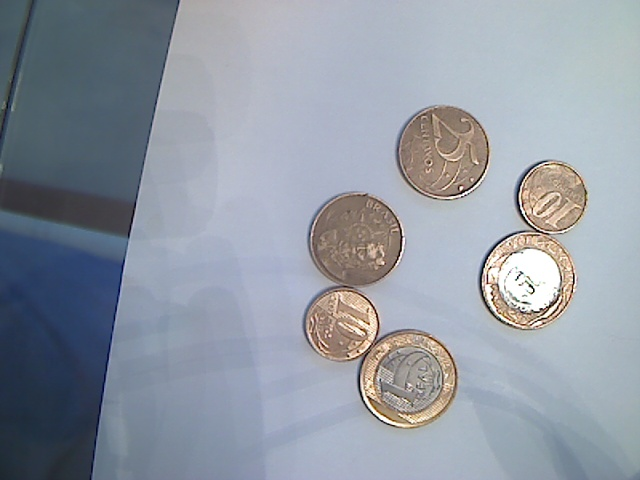

Previsao: 100. Valor real: 220


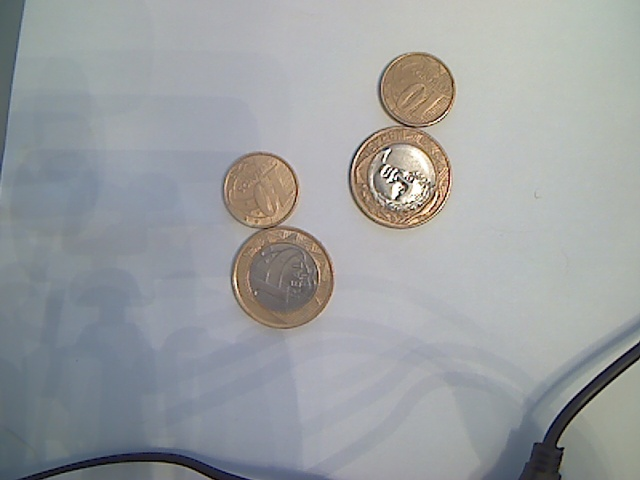

Previsao: 80. Valor real: 270


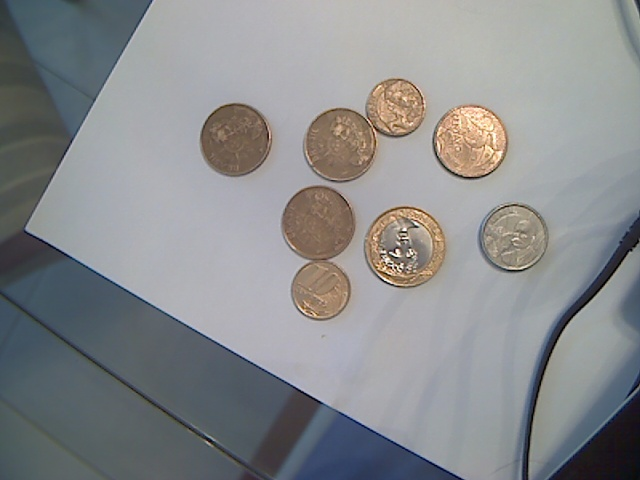

Previsao: 120. Valor real: 160


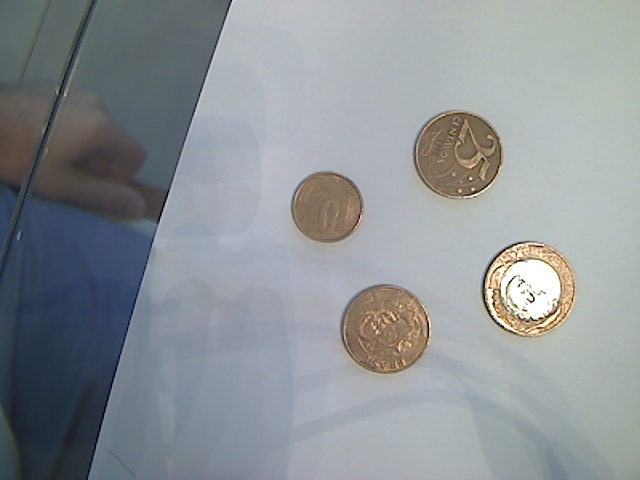

Previsao: 120. Valor real: 270


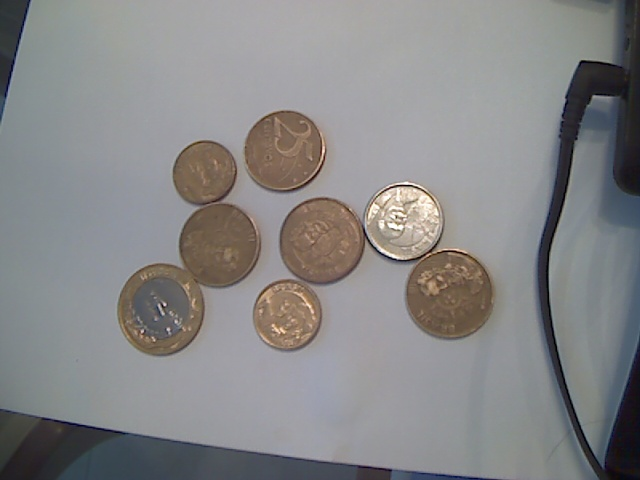

Previsao: 315. Valor real: 270


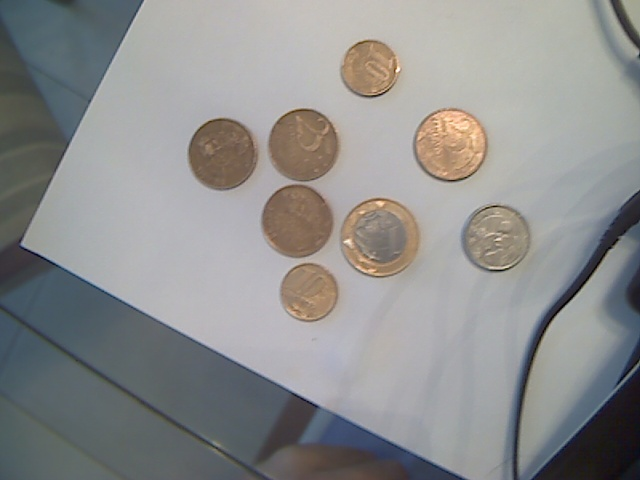

Previsao: 30. Valor real: 110


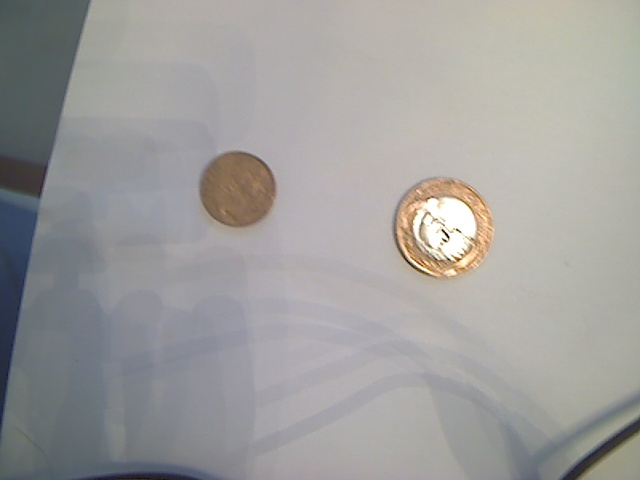

Previsao: 205. Valor real: 245


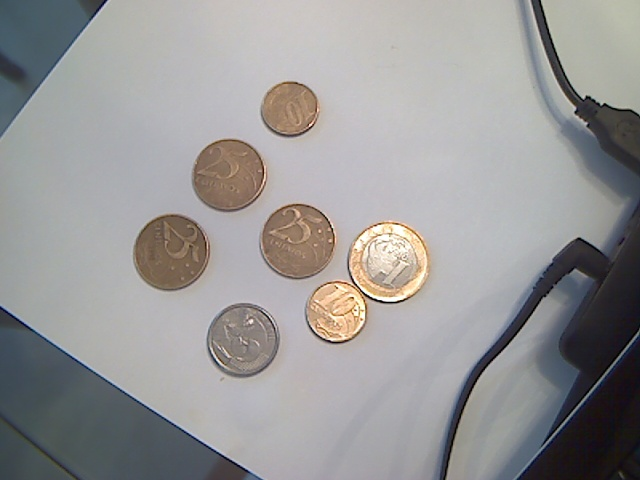

Previsao: 55. Valor real: 270


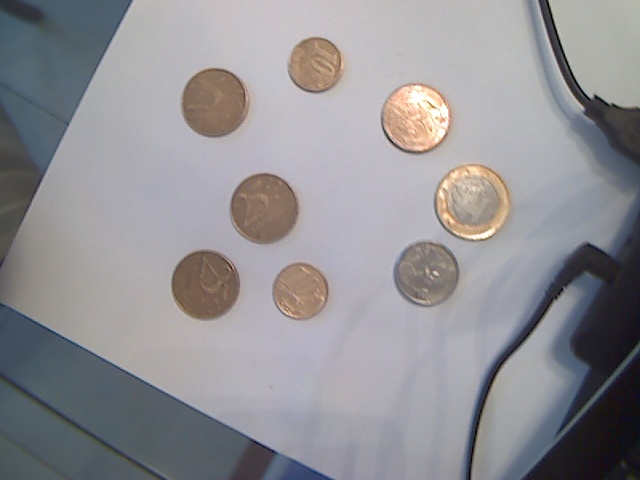

Previsao: 65. Valor real: 160


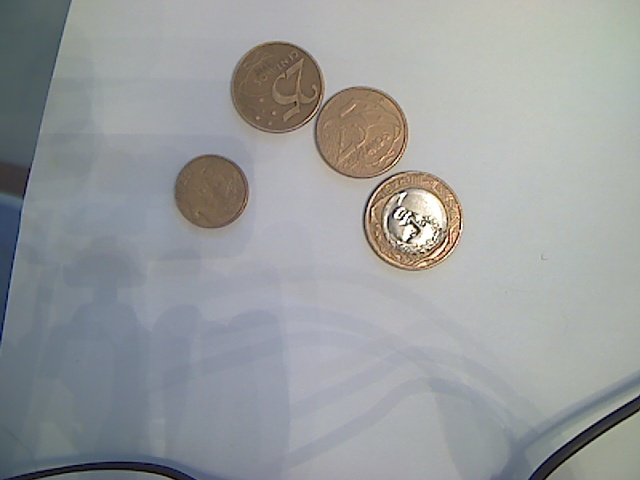

In [18]:
folder = "../data/deeplearning/unseen"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

data = my_img_to_array(onlyfiles)
predictions = model.predict(X_test)
predictions = [closer_multiple(x, multi) for x in predictions]

for i in range(len(onlyfiles[:10])):
    label_in_file = onlyfiles[i].find("_")
    value = int(onlyfiles[i][0:label_in_file])
    print("Previsao: {0}. Valor real: {1}".format(predictions[i], value))
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], height=240, width=320))